In [93]:
import tensorflow as tf


# 

In [94]:
mnist=tf.keras.datasets.mnist

In [95]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()


In [96]:
X_train.shape

(60000, 28, 28)

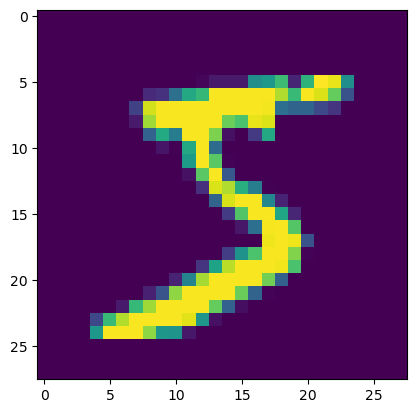

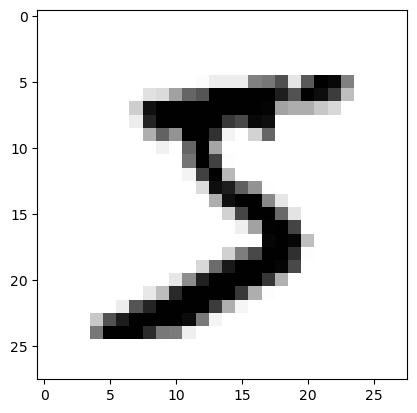

In [97]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[0],cmap=plt.cm.binary)

In [98]:
#checking the values of each pixel before normalization


In [99]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [100]:
#background in black and digit is white

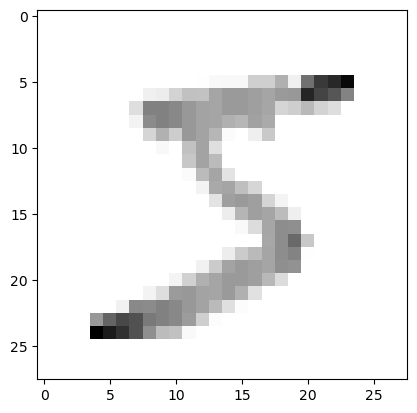

In [101]:
#normalizing the data || pre-processing

X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)
plt.imshow(X_train[0],cmap=plt.cm.binary)

In [102]:
#after normalizing 
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [103]:
#xtrain has data and ytrain has label
print(y_train[0])


5


In [104]:
#now resizing the image to make suitable for applying cnn
import numpy as np
img_size=28
#-1 corresponds to 60000
X_trainr=np.array(X_train).reshape(-1,img_size,img_size,1)#increasing one dimension for pooling/kernal operation 
X_testr=np.array(X_test).reshape(-1,img_size, img_size, 1)
print("training samples dimensions",X_trainr.shape)
print("training samples dimensions",X_testr.shape)

training samples dimensions (60000, 28, 28, 1)
training samples dimensions (10000, 28, 28, 1)


In [105]:
#creating  a neural network
from tensorflow.keras.models import Sequential#sequentially connect deeplearning layers
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [106]:
model=Sequential()
#fist convolution layer
# 0 1 2 3 (60000,28,28,1)
model.add(Conv2D(64,(3,3),input_shape=X_trainr.shape[1:]))#only for first convolution layer to mention input layer size
model.add(Activation("relu"))#activaton function
model.add(MaxPooling2D(pool_size=(2,2)))#maxpooling 

#second convolution layer
model.add(Conv2D(64,(3,3)))#only for firist convolution layer to mention input layer size
model.add(Activation("relu"))#activaton function
model.add(MaxPooling2D(pool_size=(2,2)))#maxpooling 


#third  convolution layer
model.add(Conv2D(64,(3,3)))#only for firist convolution layer to mention input layer size
model.add(Activation("relu"))#activaton function
model.add(MaxPooling2D(pool_size=(2,2)))#maxpooling 

###fully connected layer 1
model.add(Flatten())#before using fully connected layer, need to be flatten so that 2D converts to 1D
model.add(Dense(64))#
model.add(Activation("relu"))

###fully connected layer 2
model.add(Dense(32))#
model.add(Activation("relu"))


###fully connected layer 3
model.add(Dense(10))# last dense layer must 10
model.add(Activation("softmax"))#activation function is change to softmax (class probabilities)
# if binary classification ,one neuron in dense layer, so activation must be sigmoid 


In [107]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_11 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 activation_12 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [108]:
print("total training samples= ",len(X_trainr))

total training samples=  60000


In [109]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [110]:
model.fit(X_trainr,y_train,epochs=5,validation_split=0.3)#training model

Epoch 1/5
1313/1313 [==============================] - 71s 52ms/step - loss: 0.3200 - accuracy: 0.8985 - val_loss: 0.1279 - val_accuracy: 0.9599
Epoch 2/5
1313/1313 [==============================] - 58s 44ms/step - loss: 0.1012 - accuracy: 0.9694 - val_loss: 0.0843 - val_accuracy: 0.9729
Epoch 3/5
1313/1313 [==============================] - 55s 42ms/step - loss: 0.0726 - accuracy: 0.9773 - val_loss: 0.0982 - val_accuracy: 0.9716
Epoch 4/5
1313/1313 [==============================] - 55s 42ms/step - loss: 0.0587 - accuracy: 0.9813 - val_loss: 0.0621 - val_accuracy: 0.9802
Epoch 5/5
1313/1313 [==============================] - 56s 43ms/step - loss: 0.0447 - accuracy: 0.9854 - val_loss: 0.0611 - val_accuracy: 0.9809


In [111]:
#evaluating on testing data set 
test_loss,test_acc,=model.evaluate(X_testr,y_test)
print("Test Loss on 10,000 test samples",test_loss)
print("validation accuracy on 10,000 test samples ",test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.0498 - accuracy: 0.9846
Test Loss on 10,000 test samples 0.04979836568236351
validation accuracy on 10,000 test samples  0.9846000075340271


In [112]:
predictions =model.predict(X_testr)

313/313 [==============================] - 4s 12ms/step


In [113]:
print(predictions)

[[7.36061452e-07 5.13442956e-06 4.49030995e-05 ... 9.99944448e-01
  4.46663961e-07 1.61890671e-06]
 [1.77243019e-05 2.74339800e-05 9.99580204e-01 ... 3.73973831e-04
  3.74252778e-07 1.98708339e-08]
 [9.43821306e-08 9.99985456e-01 7.26094598e-08 ... 9.55889936e-06
  2.55794390e-08 2.43956697e-06]
 ...
 [9.87736282e-11 4.65371564e-09 3.83275456e-09 ... 2.48479139e-08
  2.32097477e-07 1.07676419e-06]
 [2.45221008e-06 3.09973916e-06 3.16572226e-07 ... 3.40266411e-08
  3.83295446e-05 2.22924882e-05]
 [9.36062588e-06 3.73315184e-10 1.58524222e-06 ... 1.00894160e-09
  1.00968386e-07 1.98776456e-06]]


In [114]:
print(np.argmax(predictions[0]))

7


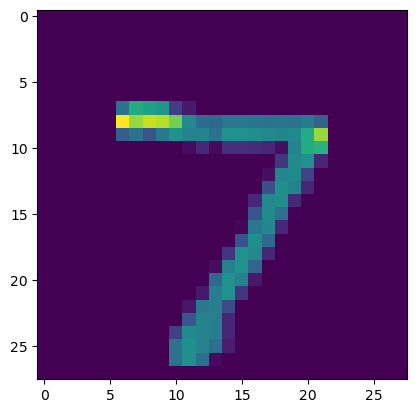

In [115]:
plt.imshow(X_test[0])

In [116]:
print(np.argmax(predictions[128]))

8


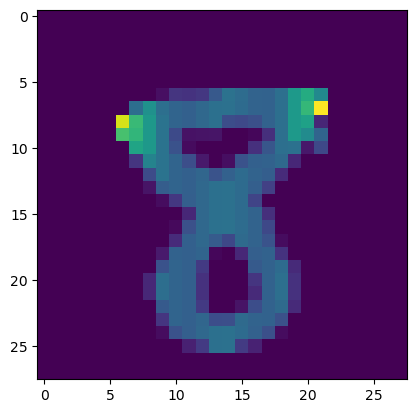

In [117]:
plt.imshow(X_test[128])

In [226]:
import cv2
img1=cv2.imread("img4.png")

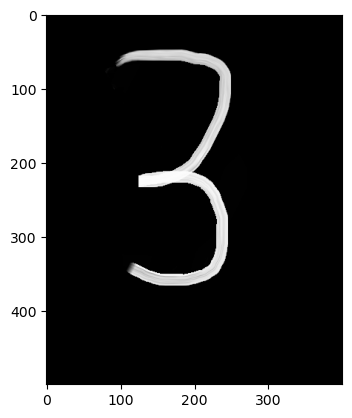

In [227]:
plt.imshow(img1)

In [228]:
img1.shape

(500, 400, 3)

In [229]:
gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)


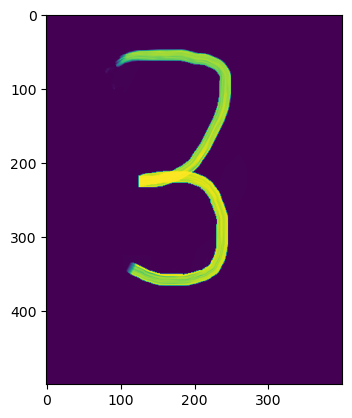

In [230]:
plt.imshow(gray)

In [231]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [232]:
gray.shape

(500, 400)

In [233]:
resized.shape

(28, 28)

In [234]:
newimg=tf.keras.utils.normalize (resized,axis=1)

In [235]:
newimg=np.array(newimg).reshape(-1,img_size,img_size,1)


In [236]:
newimg.shape

(1, 28, 28, 1)

In [237]:
predictions=model.predict(newimg)

1/1 [==============================] - 0s 40ms/step


In [238]:
print(np.argmax(predictions))

3
